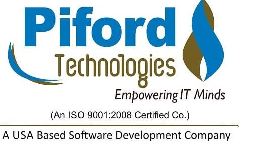
# Implementation of word2vec using Gensim

# Step 1) Data Collection
1. Data will be in json format.
This data contains three things tag, pattern, and responses. 

<b>1. The tag is the intent (what is the topic of discussion). </b>

<b>2. A pattern is a question users will ask to the bot </b>

<b>3. Responses is the answer that chatbot will provide to the corresponding question/pattern. </b>

# Example of data which is in json format
[{"tag": "welcome",   <br>

"patterns": ["Hi", "How are you", "Is any one to talk?", "Hello", "hi are you available"],

"responses": ["Hello, thanks for contacting Piford Technologies", "Good to see you here"," Hi there, how may I assist you?"]

        },
{"tag": "goodbye",

"patterns": ["Bye", "See you later", "Goodbye", "I will come back soon"],

"responses": ["See you later, thanks for visiting Piford Technologies ", "have a great day ahead", "Wish you Come back again soon."]
        },

{"tag": "thankful",

"patterns": ["Thanks for helping me", "Thank your guidance", "That's helpful and kind from you"],

"responses": ["Piford Technologies Happy to help!", "Any time!", "My pleasure", "It is my duty to help you"]
        },
  ]

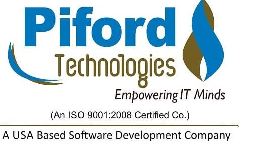

# Step 2) Data preprocessing.
It is very important to process the raw data. If cleaned data is fed to the machine, then the model will respond more accurately and will learn the data more efficiently.

This step involves removing stop words, stemming, unnecessary words, etc. Before going ahead, it is important to load data and convert it into a data frame. 

In [19]:
import json
json_file ='intents.json'  #File is stored in the variable
with open('intents.json','r') as f:
    data = json.load(f)  #File is open and loaded in data variable

In [20]:
# Now data is imported and it is time to convert data into data frame.
import pandas as pd
df = pd.DataFrame(data) #Data is converted into data frame using pandas
df['patterns'] = df['patterns'].apply(', '.join) 
df['patterns']

0    Hi, How are you, Is any one to talk?, Hello, h...
1    Bye, See you later, Goodbye, I will come back ...
2    Thanks for helping me, Thank your guidance, Th...
3    What hours are you open?, Tell your opening ti...
4    Can I pay using credit card?,  Can I pay using...
Name: patterns, dtype: object

In [21]:
import string
from nltk.corpus import stopwords
from textblob import Word
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')

def text_cleaning(a):
 remove_punctuation = [char for char in a if char not in string.punctuation]
 #print(remove_punctuation)
 remove_punctuation=''.join(remove_punctuation)
 #print(remove_punctuation) 
 remove_punctuation=[word for word in remove_punctuation.split()]
 #print(remove_punctuation)
 remove_punctuation= [w for w in remove_punctuation if w.lower() not in stopwords.words('english')]
 #print(remove_punctuation)   
 return remove_punctuation
 #remove_punctuation= [w for w in wordnet_lemmatizer.lemmatize(remove_punctuation) ]
 #print(remove_punctuation)   

df['patterns']=df['patterns'].apply(text_cleaning)    


In [22]:
df['patterns']

0                [Hi, one, talk, Hello, hi, available]
1         [Bye, See, later, Goodbye, come, back, soon]
2    [Thanks, helping, Thank, guidance, Thats, help...
3    [hours, open, Tell, opening, time, open, timin...
4    [pay, using, credit, card, pay, using, Masterc...
Name: patterns, dtype: object

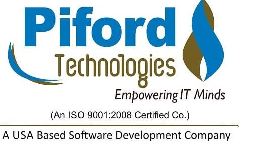
# Step 3) Neural Network building using word2vec

Now it is time to build a model using Gensim module word2vec. We have to import word2vec from Gensim. Let us do this, and then we will build and in the final stage we will check the model on real time data.

In [23]:
from gensim.models import Word2Vec

In [1]:
# Text is provided to the model in the form of a list so we will convert the text from data frame to list using the below code

Bigger_list=[]  #Created the bigger_list where the inner list is appended. This is the format which is fed to the model Word2Vec
for i in df['patterns']:
     #li = list(i.split("")) #Each element of the column patterns is split and stored in the inner list li
     Bigger_list.append(i)
     print(Bigger_list)
Model= Word2Vec(Bigger_list,min_count=1,size=300,workers=4) #This list is provided to the Word2Vec model.


#min_count - Words that appear only once or twice in a billion-word corpus are probably garbage, so it’s best to ignore them
# default value is 5 of mincount
#Bigger size values require more training data, but can lead to better (more accurate) models.  # default value is 100
#default = 1 worker (means no other parallel processing)
#The workers parameter has only effect if you have Cython installed. Without Cython, you’ll only be able to use one core
#because of the GIL (and word2vec training will be miserably slow).

NameError: name 'df' is not defined


 Min_count: It will ignore all the words with a total frequency lower than this.

 Size: It tells the dimensionality of the word vectors.

 Workers: These are the threads to train the model


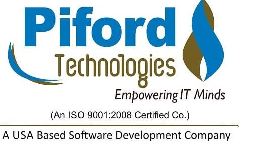
# Step 4) Model saving

Model can be saved in the form of bin and model form. Bin is the binary format. Please see the below lines to save the model


In [25]:
model.save("word2vec.model")
model.save("model.bin")

We will use this model to do real time testing such as Similar words, dissimilar words, and most common words.

# Step 5) Loading model and performing real time testing
Model is loaded using below code

In [26]:
model = Word2Vec.load('model.bin')

#If you want to print the vocabulary from it is done using below command 

vocab = list(model.wv.vocab)
vocab
#Please see the result

['PM',
 'denies',
 'knowledge',
 'of',
 'AWB',
 'kickbacks',
 'The',
 'Prime',
 'Minister',
 'has',
 'denied',
 'he',
 'knew',
 'was',
 'paying',
 'to',
 'Iraq',
 'despite',
 'writing',
 'the',
 'wheat',
 'exporter',
 'asking',
 'be',
 'kept',
 'fully',
 'informed',
 'on',
 'sales',
 '.',
 'Letters',
 'from',
 'John',
 'Howard',
 'and',
 'Deputy',
 'Mark',
 'Vaile',
 'have',
 'been',
 'released',
 'by',
 'Cole',
 'inquiry',
 'into',
 'oil',
 'for',
 'food',
 'program',
 'In',
 'one',
 'letters',
 'Mr',
 'asks',
 'managing',
 'director',
 'Andrew',
 'Lindberg',
 'remain',
 'in',
 'close',
 'contact',
 'with',
 'Government',
 'Opposition',
 "'",
 's',
 'Gavan',
 'O',
 'Connor',
 'says',
 'letter',
 'sent',
 '2002',
 ',',
 'same',
 'time',
 'though',
 'a',
 'trucking',
 'company',
 'He',
 'can',
 'longer',
 'wipe',
 'its',
 'hands',
 'illicit',
 'payments',
 'which',
 '$',
 '290',
 'million',
 '"',
 'responsibility',
 'this',
 'must',
 'lay',
 'may',
 'at',
 'feet',
 'Coalition',
 'minist

# Step 6) Most Similar words checking
Let us implement the things practically

In [27]:
similar_words = model.most_similar('thanks')
print(similar_words)

[('colony', 0.9771329760551453), ('demanding', 0.9764226078987122), ('prevention', 0.9747525453567505), ('groundwater', 0.9715413451194763), ('boosts', 0.970259964466095), ('imaged', 0.9702489972114563), ('destroying', 0.9694152474403381), ('analyse', 0.9691178202629089), ('amid', 0.9686824083328247), ('croc', 0.9684835076332092)]


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


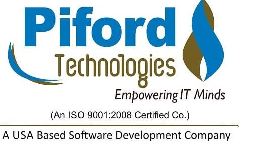
# Step 7) Does not match word from words supplied


In [28]:
dissimlar_words = model.doesnt_match('See you later, thanks for visiting'.split())
print(dissimlar_words)

#model.doesnt_match("breakfast cereal dinner lunch";.split())  input 
#'cereal'   output

you


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


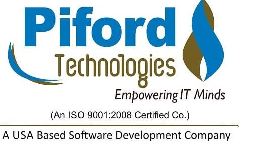
# Step 8) Finding the similarity between two words
This will tell result in probability of similarity between two words. Please see the below code how to execute this section.

In [29]:
similarity_two_words = model.similarity('you','see')
#similarity_two_words = model.similarity('abc','see')
print("Please provide the similarity between these two words:")
print(similarity_two_words)

Please provide the similarity between these two words:
0.6009736


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [30]:
#You can further find similar words by executing the below code

similar = model.similar_by_word('kind')
print(similar)

[('view', 0.9246548414230347), ('mystery', 0.9129921197891235), ('particular', 0.9090055227279663), ('course', 0.9026365280151367), ('presence', 0.8922653794288635), ('nature', 0.8907825946807861), ('pattern', 0.8884947299957275), ('position', 0.8862802982330322), ('sign', 0.8855308890342712), ('feeling', 0.8801596164703369)]


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
